# Notebook Import and Packages

In [211]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map
from math import log
from sympy import symbols,diff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Example 1- A Simple Cost Function

## $f(x)=x^2+x+1$

In [212]:
def f(x):
    return x**2 + x + 1

In [213]:
# Generate the data
x_1=np.linspace(start=-3,stop=3,num=500)

# Slope & Derivatives

In [214]:
# challege 1 : create a python function for finding the deerivative 

def df(x):
    return 2*x + 1

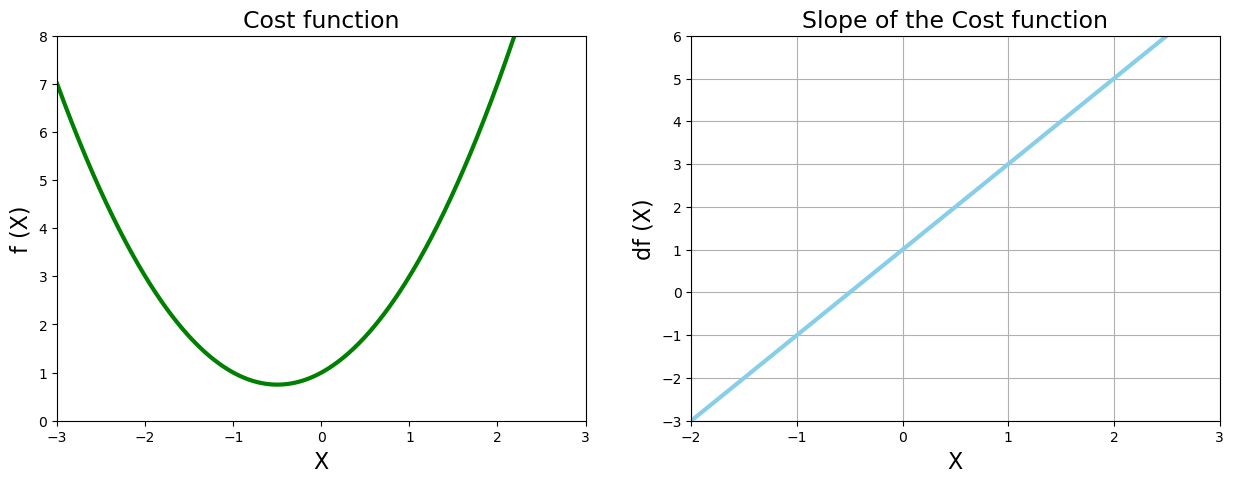

In [215]:
# plot 

plt.figure(figsize=[15,5])
# chart 1 : Cost Function
plt.subplot(1,2,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('f (X)', fontsize=16)
plt.plot(x_1 , f(x_1),color='green',linewidth=3)

# chart2: Derivative
plt.subplot(1,2,2)
plt.plot(x_1 , df(x_1),color='skyblue',linewidth=3)
plt.title('Slope of the Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('df (X)', fontsize=16)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid(True)
plt.show()

## Python loops and Gradient Decent Algorithm

In [216]:
# python for loop
for i in range(5) :
    print('Hello World',i)

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4


In [217]:
# python while loop

counter =0
while(counter<7):
    print('counting...',counter)
    counter=counter+1

print('End of while loop')

counting... 0
counting... 1
counting... 2
counting... 3
counting... 4
counting... 5
counting... 6
End of while loop


In [218]:
# Gradient Decent

#initial guessing
new_x=3
previous_x=0
#alpha- value
step_multiplier=0.1
precision=0.00001

x_list=[new_x]
slope_list=[df(new_x)]

for i in range(500):
    previous_x=new_x
    gradient=df(previous_x)
    new_x=previous_x-(gradient*step_multiplier)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    stepsize=abs(new_x-previous_x)
    if stepsize<precision:
        print('The loops breaks  at the iteration no: ', i)
        break
    
print('Local Minimum ocuurs at:',new_x)
print('Slope or df(x) value of this point: ',df(new_x))
print('f(x) value or cost at this point is: ',f(new_x))

The loops breaks  at the iteration no:  50
Local Minimum ocuurs at: -0.49996003706460423
Slope or df(x) value of this point:  7.992587079153068e-05
f(x) value or cost at this point is:  0.7500000015970362


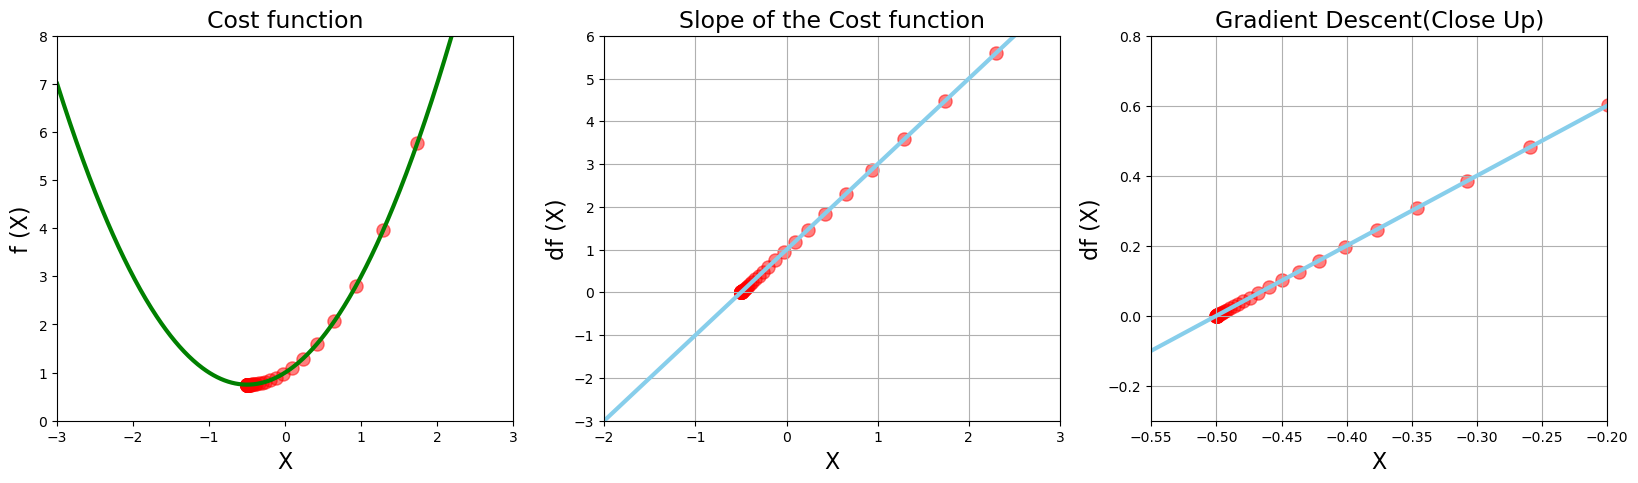

In [219]:
#  Super Impose the Gradient Decent Calculations

plt.figure(figsize=[20,5])
# chart 1 : Cost Function
plt.subplot(1,3,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('f (X)', fontsize=16)
plt.plot(x_1 , f(x_1),color='green',linewidth=3)

values=np.array(x_list)
plt.scatter(x_list,f(values), color='red',s=90,alpha=0.5)

# chart2: Derivative
plt.subplot(1,3,2)
plt.plot(x_1 , df(x_1),color='skyblue',linewidth=3)
plt.title('Slope of the Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('df (X)', fontsize=16)
plt.xlim(-2,3)
plt.ylim(-3,6)

values=np.array(slope_list)
plt.scatter(x_list,slope_list, color='red',s=90,alpha=0.5)

plt.grid(True)


# chart3: Derivatives(CloseUp)
plt.subplot(1,3,3)
plt.plot(x_1 , df(x_1),color='skyblue',linewidth=3)
plt.title('Gradient Descent(Close Up)',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('df (X)', fontsize=16)
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)

values=np.array(slope_list)
plt.scatter(x_list,slope_list, color='red',s=90,alpha=0.5)

plt.grid(True)
plt.show()

# Multiple Minima vs Advance Guess and Advanced functions
## $$ g(x)=x^4-4x^2+5 $$

In [220]:
# make some data
x_2=np.linspace(-2,2,1000)

In [221]:
# defining the function
def g(x):
    return (x**4)-(4*x**2)+5

In [222]:
# derivative function

def dg(x):
    return 4*(x**3)-(8*x)

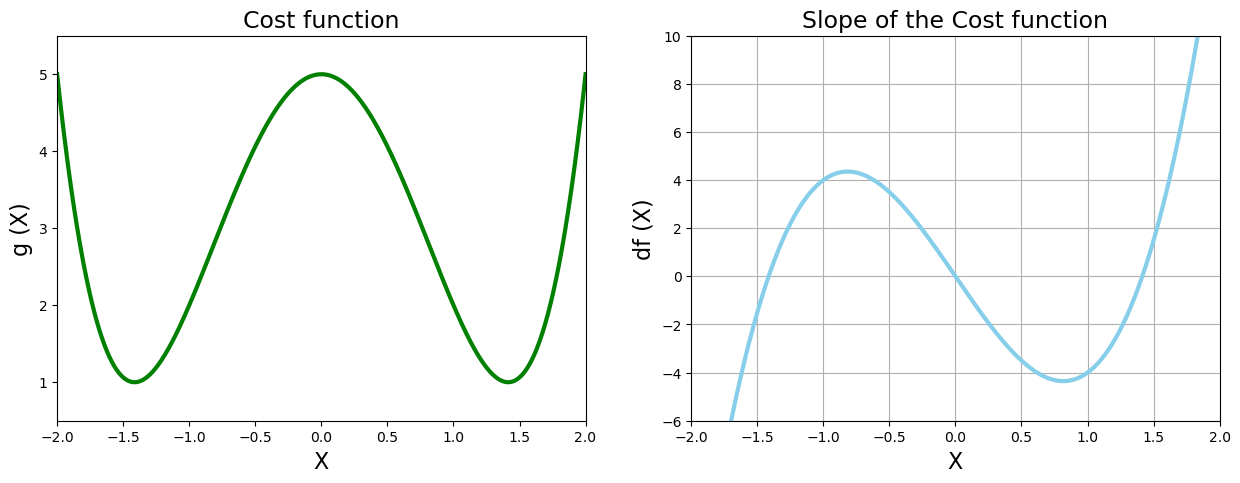

In [223]:
# plot 

plt.figure(figsize=[15,5])
# chart 1 : Cost Function 2
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('g (X)', fontsize=16)
plt.plot(x_2 , g(x_2),color='green',linewidth=3)

# chart2: Derivative2
plt.subplot(1,2,2)
plt.plot(x_2 , dg(x_2),color='skyblue',linewidth=3)
plt.title('Slope of the Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('df (X)', fontsize=16)
plt.xlim(-2,2)
plt.ylim(-6,10)
plt.grid(True)
plt.show()

# Batch Gradient Descent as a Python Function

In [224]:
# Gradient Decent

def gradient_descent(derivative_func,initial_guess,multiplier=0.02,precision=0.001, max_iter=500):

    new_x=initial_guess
    
    x_list=[new_x]
    slope_list=[derivative_func(new_x)]
    
    for i in range(max_iter):
        previous_x=new_x
        gradient=derivative_func(previous_x)
        new_x=previous_x-(gradient*multiplier)
        
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        stepsize=abs(new_x-previous_x)
        if stepsize<precision:
            break

    return new_x , x_list , slope_list

In [225]:
local_min , list_x , list_slope = gradient_descent(dg,0.5,0.02,0.001)
print('Local minimum occurs at: ',new_x)
print('Number of Steps: ', len(list_x))

Local minimum occurs at:  -0.49996003706460423
Number of Steps:  23


In [226]:
local_min , list_x , list_slope = gradient_descent(derivative_func=dg,initial_guess=0.5) #here multipiler and precision are optional parameter
print('Local minimum occurs at: ',new_x)
print('Number of Steps: ', len(list_x))

Local minimum occurs at:  -0.49996003706460423
Number of Steps:  23


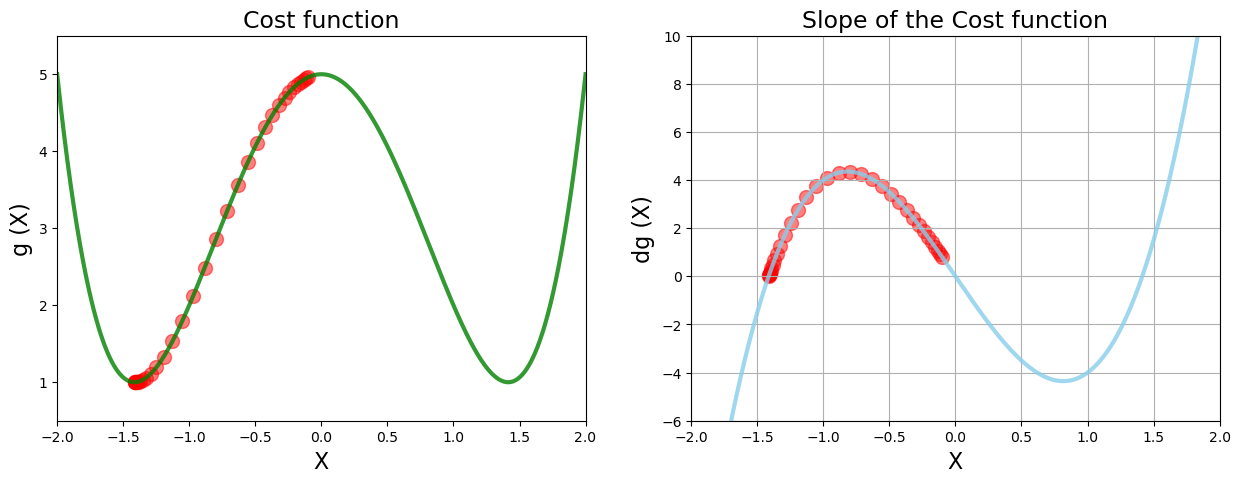

In [227]:
# Calling gradient decent function
local_min , list_x , list_slope = gradient_descent(derivative_func=dg,initial_guess=-0.1)
# plot function and derivative and scatter plot

plt.figure(figsize=[15,5])
# chart 1 : Cost Function 2
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('g (X)', fontsize=16)
plt.plot(x_2 , g(x_2),color='green',linewidth=3,alpha=0.8)
plt.scatter(list_x , g(np.array(list_x)) , color='red' , s=100 , alpha=0.5)
# chart2: Derivative2
plt.subplot(1,2,2)
plt.plot(x_2 , dg(x_2),color='skyblue',linewidth=3, alpha=0.8)
plt.title('Slope of the Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg (X)', fontsize=16)
plt.xlim(-2,2)
plt.ylim(-6,10)
plt.grid(True)
plt.scatter(list_x , list_slope , color='red' , s=100 , alpha=0.5)
plt.show()

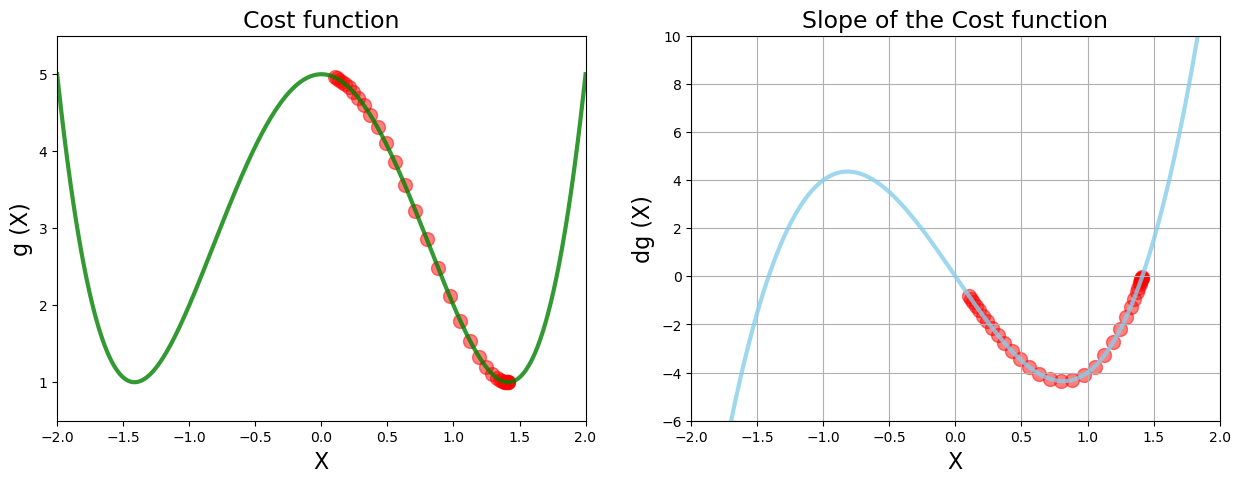

In [228]:
# Calling gradient decent function
local_min , list_x , list_slope = gradient_descent(derivative_func=dg,initial_guess=0.1)
# plot function and derivative and scatter plot

plt.figure(figsize=[15,5])
# chart 1 : Cost Function 2
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('g (X)', fontsize=16)
plt.plot(x_2 , g(x_2),color='green',linewidth=3,alpha=0.8)
plt.scatter(list_x , g(np.array(list_x)) , color='red' , s=100 , alpha=0.5)
# chart2: Derivative2
plt.subplot(1,2,2)
plt.plot(x_2 , dg(x_2),color='skyblue',linewidth=3, alpha=0.8)
plt.title('Slope of the Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg (X)', fontsize=16)
plt.xlim(-2,2)
plt.ylim(-6,10)
plt.grid(True)
plt.scatter(list_x , list_slope , color='red' , s=100 , alpha=0.5)
plt.show()

# Example 3- Divergence,Overflow and Python Tuples
## $$ h(x)=x^5-2x^4+2 $$

In [229]:
# generate some data
x_3=np.linspace(start=-2.5,stop=2.5,num=1000)

def h(x):
    return (x**5)-2*(x**4)+2

def dh(x):
    return 5*(x**4)-8*(x**3)

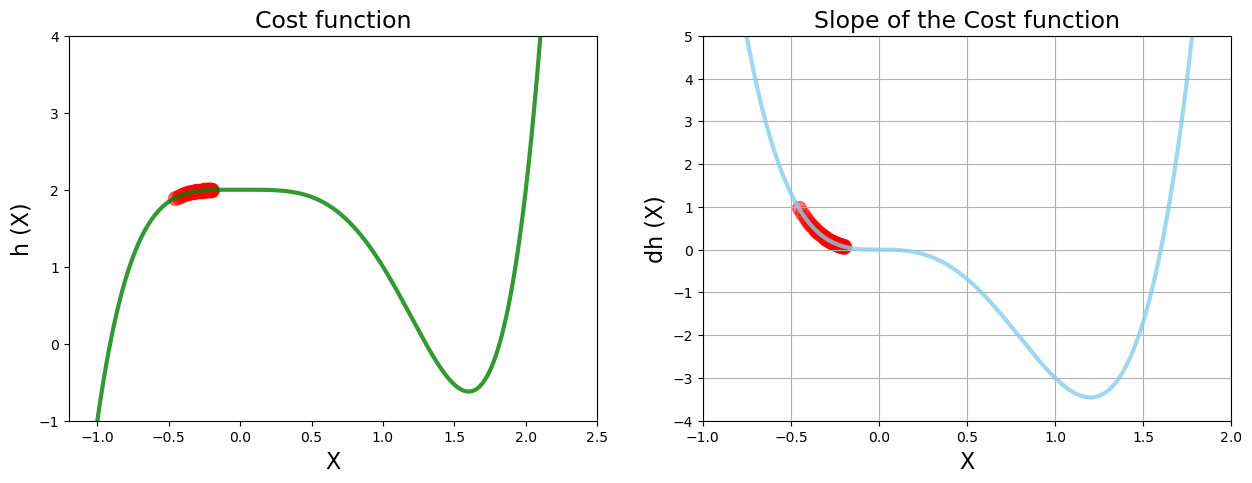

Local minima occurs at:  -0.4541912837874714
Cost at this minimum is:  1.8955607867260171
Number of steps:  56


In [230]:
# Calling gradient decent function
local_min , list_x , list_slope = gradient_descent(derivative_func=dh,initial_guess=-0.2, max_iter=55)
# plot function and derivative and scatter plot

plt.figure(figsize=[15,5])
# chart 1 : Cost Function 2
plt.subplot(1,2,1)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.title('Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('h (X)', fontsize=16)
plt.plot(x_3 , h(x_3),color='green',linewidth=3,alpha=0.8)
plt.scatter(list_x , h(np.array(list_x)) , color='red' , s=100 , alpha=0.5)
# chart2: Derivative2
plt.subplot(1,2,2)
plt.plot(x_3 , dh(x_3),color='skyblue',linewidth=3, alpha=0.8)
plt.title('Slope of the Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dh (X)', fontsize=16)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.grid(True)
plt.scatter(list_x , list_slope , color='red' , s=100 , alpha=0.5)
plt.show()

print('Local minima occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_slope))

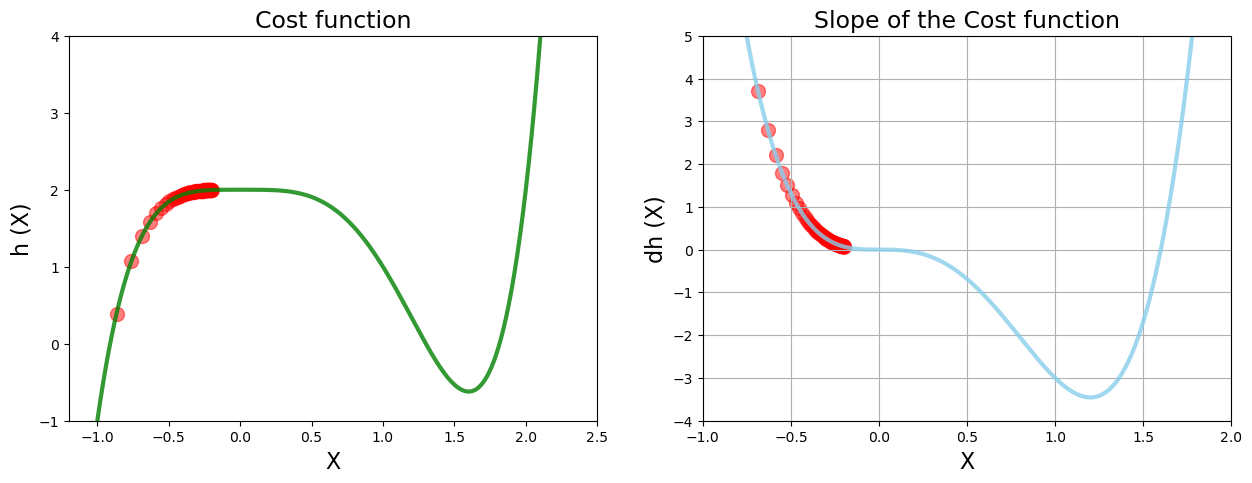

Local minima occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [231]:
# Calling gradient decent function
local_min , list_x , list_slope = gradient_descent(derivative_func=dh,initial_guess=-0.2, max_iter=71)
# plot function and derivative and scatter plot

plt.figure(figsize=[15,5])
# chart 1 : Cost Function 2
plt.subplot(1,2,1)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.title('Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('h (X)', fontsize=16)
plt.plot(x_3 , h(x_3),color='green',linewidth=3,alpha=0.8)
plt.scatter(list_x , h(np.array(list_x)) , color='red' , s=100 , alpha=0.5)
# chart2: Derivative2
plt.subplot(1,2,2)
plt.plot(x_3 , dh(x_3),color='skyblue',linewidth=3, alpha=0.8)
plt.title('Slope of the Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dh (X)', fontsize=16)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.grid(True)
plt.scatter(list_x , list_slope , color='red' , s=100 , alpha=0.5)
plt.show()

print('Local minima occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_slope))

In [232]:
import sys
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [233]:
# creating a tuple - tuple packing
breakfast='bread', 'jam','egg'
unlucky_numbers=13,9,26,4,17

# accessing value in tupple
print('I love '+ breakfast[2])
print('My hotel no is ' + str(unlucky_numbers[2]))

# tuples are immutable so, breakfast[0]='banana' will through an error
not_myAdress=1 , 'Infinite loop' , 9217 , 'chocho' # tupple can contain diffrent data formats

tuple_with_single_value=43,
type(tuple_with_single_value)

starter,mid,end=breakfast ## how data can be fetched from a tupple
print('My favorite was ',mid)

data_tupple= gradient_descent(derivative_func=dh,initial_guess=0.2)
print('Local min is: ', data_tupple[0])
print('The cost at the local min is: ', h(data_tupple[0]))
print('Number of step is: ', len(data_tupple[1]) )

I love egg
My hotel no is 26
My favorite was  jam
Local min is:  1.5989534547394717
The cost at the local min is:  -0.6214287992331258
Number of step is:  117


# Learning Rate (multiplier)

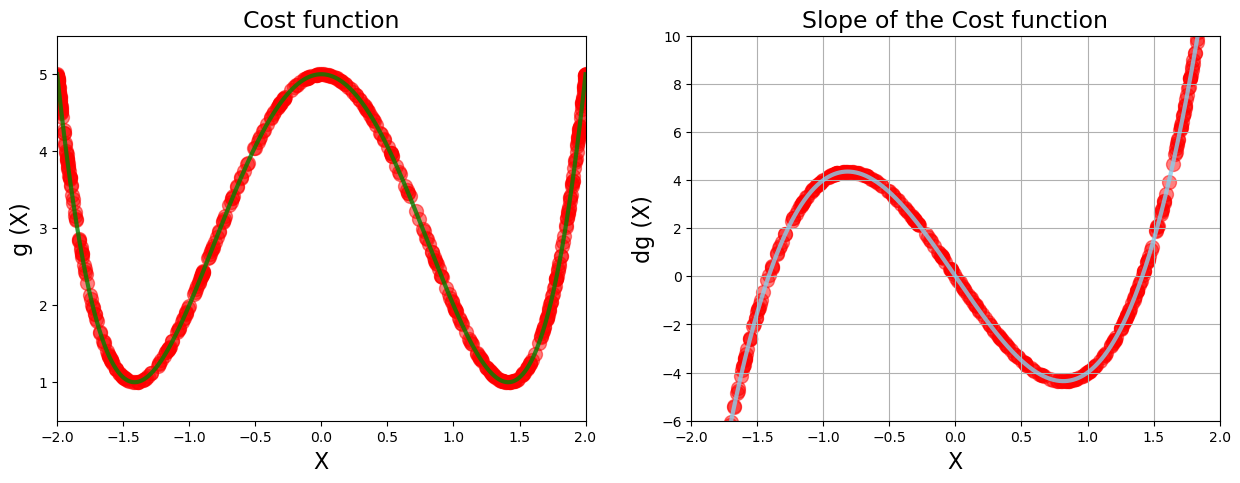

Number of steps:  501


In [234]:
# Calling gradient decent function
local_min , list_x , list_slope = gradient_descent(derivative_func=dg,initial_guess=1.9, multiplier=0.25,max_iter=500)
# plot function and derivative and scatter plot

plt.figure(figsize=[15,5])
# chart 1 : Cost Function 2
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('g (X)', fontsize=16)
plt.plot(x_2 , g(x_2),color='green',linewidth=3,alpha=0.8)
plt.scatter(list_x , g(np.array(list_x)) , color='red' , s=100 , alpha=0.5)
# chart2: Derivative2
plt.subplot(1,2,2)
plt.plot(x_2 , dg(x_2),color='skyblue',linewidth=3, alpha=0.8)
plt.title('Slope of the Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg (X)', fontsize=16)
plt.xlim(-2,2)
plt.ylim(-6,10)
plt.grid(True)
plt.scatter(list_x , list_slope , color='red' , s=100 , alpha=0.5)
plt.show()
print('Number of steps: ', len(list_x))

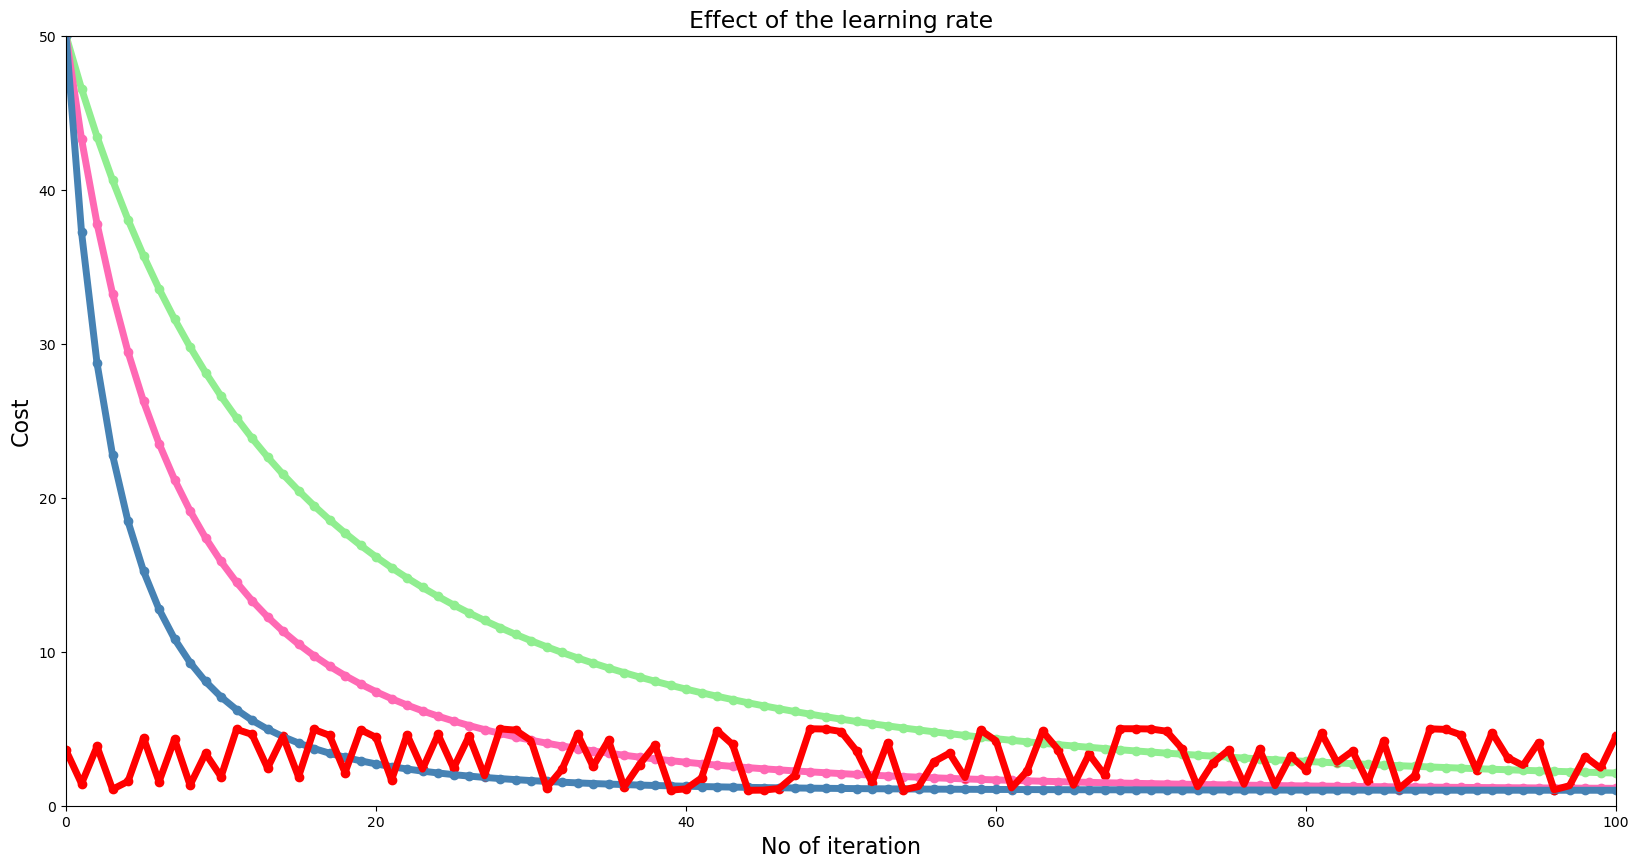

In [235]:
# Run gradient descent 3 times:
n=100


low_gamma = gradient_descent(derivative_func=dg,initial_guess=3, multiplier=0.0005,precision=0.0001,max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg,initial_guess=3, multiplier=0.001,precision=0.0001,max_iter=n)
high_gamma = gradient_descent(derivative_func=dg,initial_guess=3, multiplier=0.002,precision=0.0001,max_iter=n)
# Experiment
insane_gamma = gradient_descent(derivative_func=dg,initial_guess=1.9, multiplier=0.25,precision=0.0001,max_iter=n)
# plotting reduction in cost function at each iteration
plt.figure(figsize=[20,10])
plt.xlim(0,n)
plt.ylim(0,50)
plt.title('Effect of the learning rate',fontsize=17)
plt.xlabel('No of iteration',fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Y value for our graph
low_values=np.array(low_gamma[1])
# x value for our graph
iteration_list=list(range(0,n+1))

# plot low learning rate
plt.plot(iteration_list , g(low_values),color='lightgreen',linewidth=5)
plt.scatter(iteration_list , g(low_values) , color='lightgreen')

# plot mid learning rate

mid_values=np.array(mid_gamma[1])
plt.plot(iteration_list , g(mid_values),color='hotpink',linewidth=5)
plt.scatter(iteration_list , g(mid_values) , color='hotpink')

# plot high learning rate
high_values=np.array(high_gamma[1])
plt.plot(iteration_list , g(high_values),color='steelblue',linewidth=5)
plt.scatter(iteration_list , g(high_values) , color='steelblue')

# plot insane learning rate
insane_values=np.array(insane_gamma[1])
plt.plot(iteration_list , g(insane_values),color='red',linewidth=5)
plt.scatter(iteration_list , g(insane_values) , color='red')
plt.show()

# Data Viz with 3D Charts
## Minimise $$ f(x , y)= \frac{1}{3^{-x^2-y^2}+1} $$

In [236]:
def f(x,y):
    r=3**(-x**2 - y**2)
    return 1/(r+1)

In [237]:
# Making data to plot our f(x,y) function
x_4=np.linspace(start=-2 , stop=2 , num=200)
y_4=np.linspace(start=-2 , stop=2 , num=200)

#make the x_4 and y_4 a two dimentional array
x_4,y_4=np.meshgrid(x_4 , y_4)

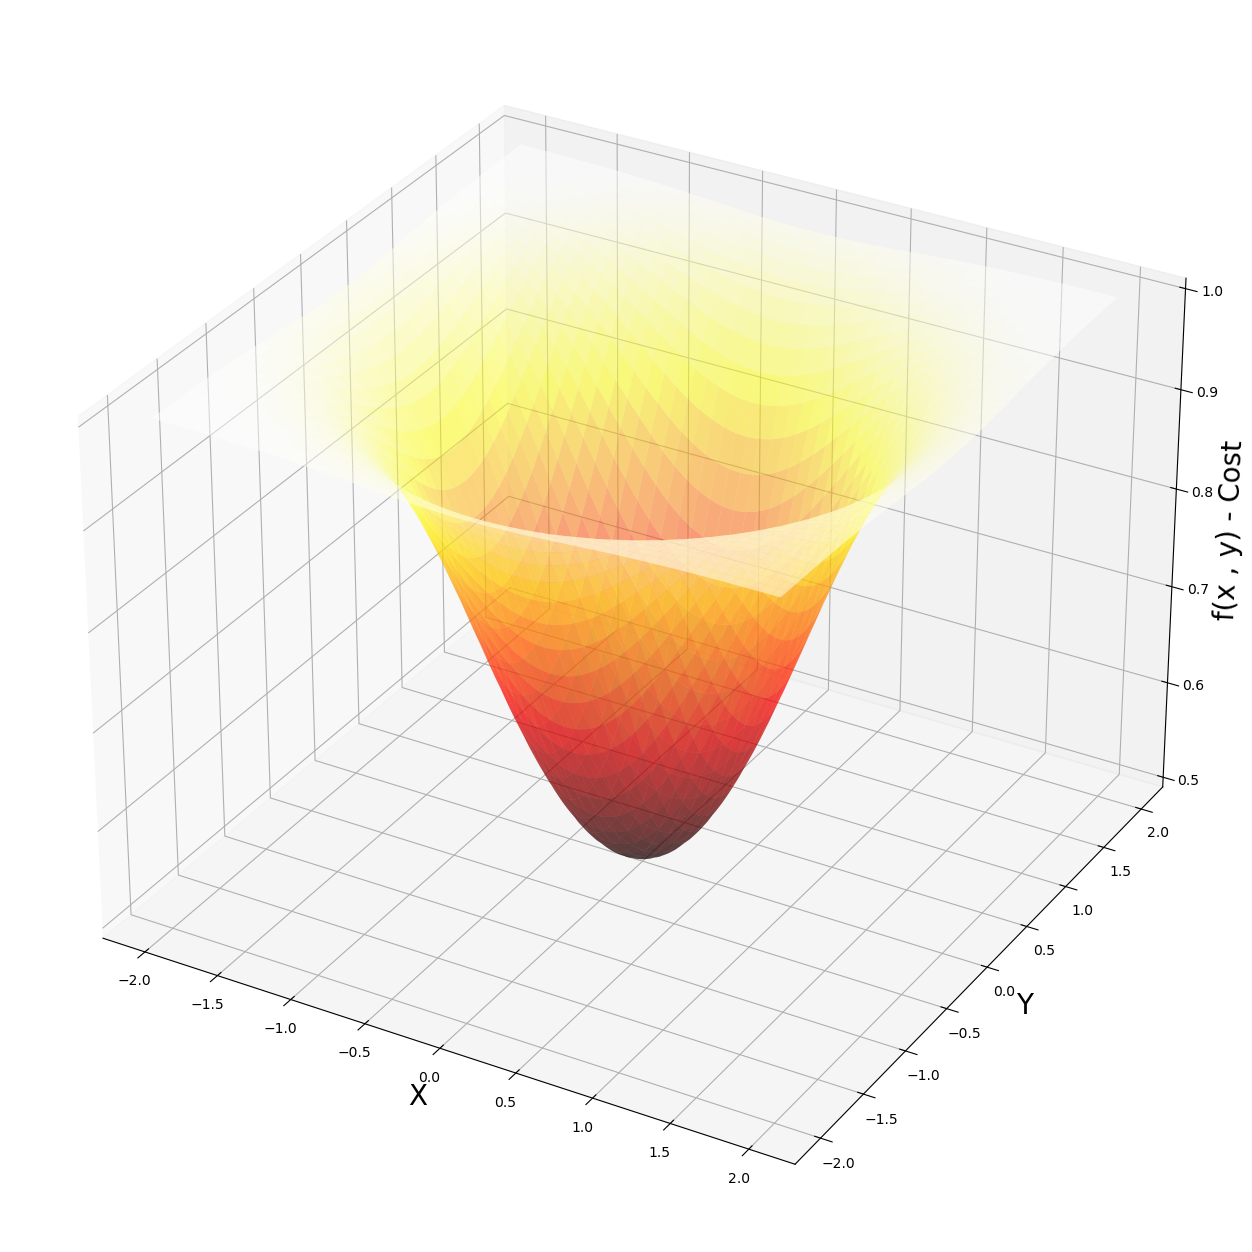

In [238]:
# creating the 3 d chart
fig=plt.figure(figsize=[16,16])
ax=fig.add_subplot(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x , y) - Cost', fontsize=20)
ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap=cm.hot, alpha=0.5)
plt.show()

# Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

In [239]:
a,b=symbols('x,y')
print('My function f(x) is : ',f(a,b))

print(diff(f(a,b) , a))
print(diff(f(a,b) , b))

print('Value of f(x) at x=1.8 and y=1.0 is : ', f(a,b).evalf(subs={a:1.8 , b:1.0})) # python dictionary = map in c++

print('Value of partial derivative wrt x at x=1.8 and y=1.0 is : ', diff(f(a,b) ,a).evalf(subs={a:1.8 , b:1.0}))

My function f(x) is :  1/(3**(-x**2 - y**2) + 1)
2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x) at x=1.8 and y=1.0 is :  0.990604794032582
Value of partial derivative wrt x at x=1.8 and y=1.0 is :  0.0368089716197505


# Batch Gradient Descent with Sympy

In [240]:
multiplier=0.1
max_iter=500
params=np.array([1.8 , 1.0])
for n in range(max_iter):
    temp = params
    gradient_x = diff( f(a,b) , a ).evalf( subs={a:temp[0] , b:temp[1] })
    gradient_y = diff( f(a,b) , b).evalf( subs={a:temp[0] , b:temp[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - gradients*multiplier

# Results
print('Values in gradients array: ', gradients)
print('Minimum occurs at X value: ', temp[0])
print('Minimum occurs at Y value: ', temp[1])
print('Cost at minimum: ', f(temp[0],temp[1]))

Values in gradients array:  [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at X value:  3.65939903638390e-11
Minimum occurs at Y value:  2.03299946465772e-11
Cost at minimum:  0.500000000000000


In [241]:
# Partial derivative functions example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [242]:
# Setup
multiplier = 0.1
max_iter = 100
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [0.13086082 0.07270045]
Minimum occurs at x value of:  0.22554260634177148
Minimum occurs at y value of:  0.12530144796765078
The cost is:  0.518275488025232


# Graphing 3D Gradient Descent & Advanced Numpy Array

In [243]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess
values_array=params.reshape(1,2)
print(values_array.shape)#  first time: It is a tupple

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array=np.append(values_array , params.reshape(1,2) , axis=0)
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


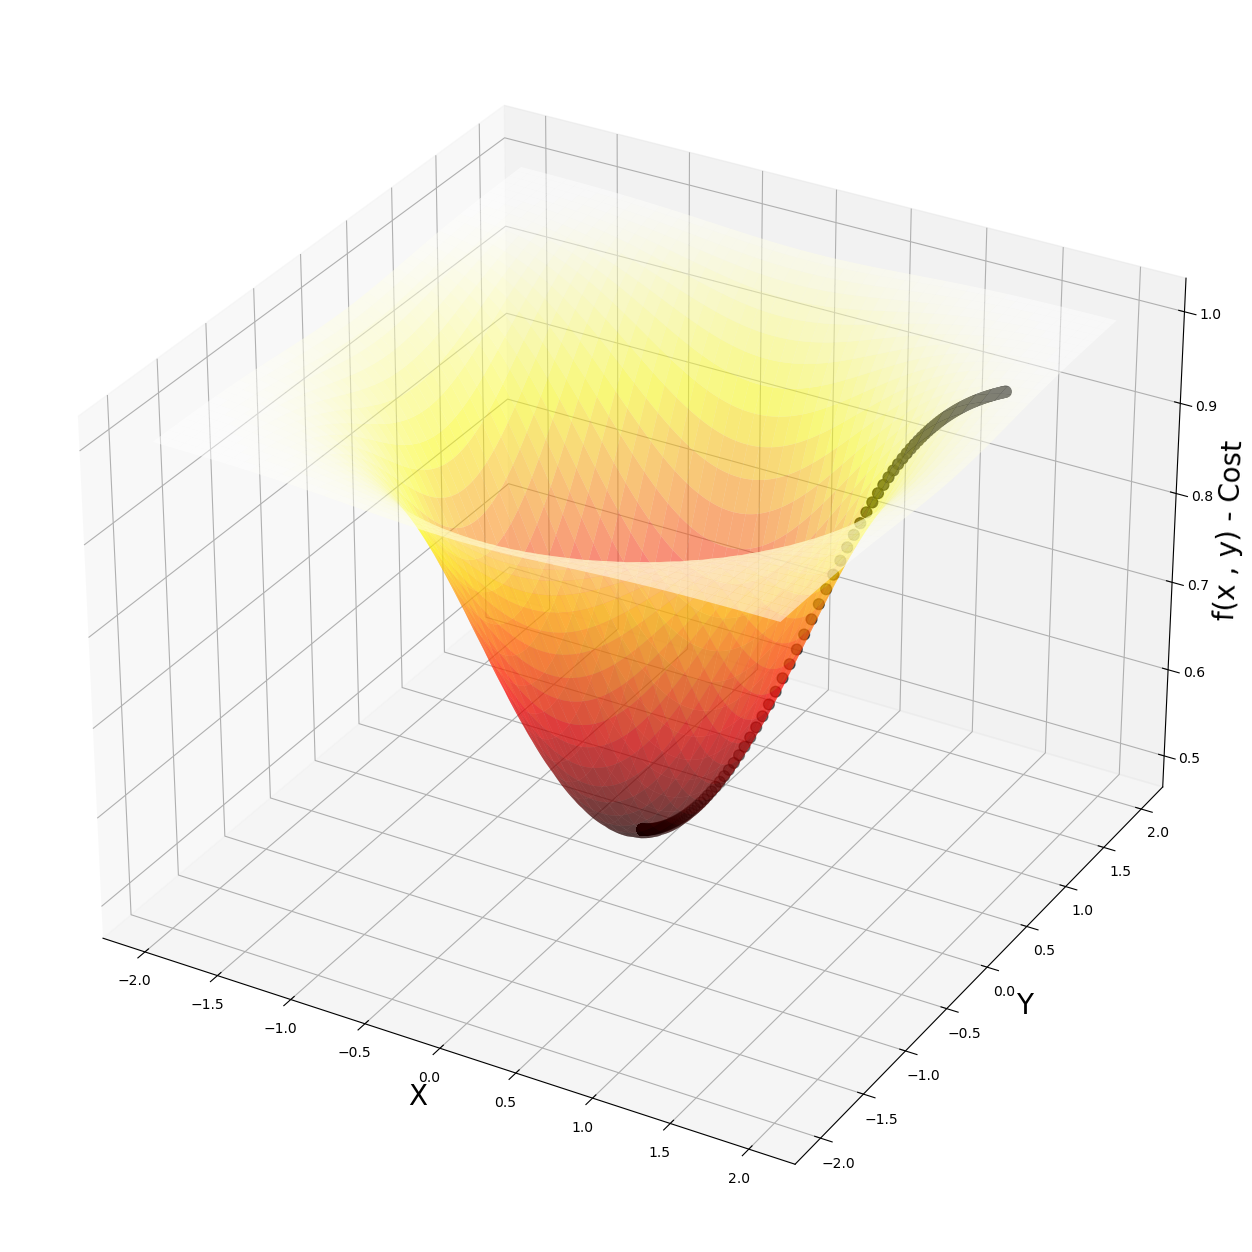

In [244]:
# creating the 3 d chart
fig=plt.figure(figsize=[16,16])
ax=fig.add_subplot(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x , y) - Cost', fontsize=20)
ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap=cm.hot, alpha=0.5)
ax.scatter(values_array[:,0] , values_array[:,1] , f(values_array[:,0] , values_array[:,1]) , s=60 , color='black')
plt.show()

In [245]:
# Advance Numpy Array Practice
kirk=np.array([['Captain' , 'Guitar']])
print(kirk.shape)

friends=np.array([['sagnik' , 'motherboard'] , ['sourik' , 'goodboy']])
print(friends.shape)
print('friends[0] : ', friends[0])
print('friends[0][0] : ', friends[0][0])
print('friends[1][0] : ', friends[1][0])

the_root=np.append(arr=friends,values=kirk,axis=0)
print(the_root)
# sagnik, sourik, captain
print(the_root[:,1])
print(the_root[0,:])
print(the_root[:,0])
the_root=np.append(arr=the_root , values=[['Reet','singer']],axis=0)
print(the_root[:,0])

(1, 2)
(2, 2)
friends[0] :  ['sagnik' 'motherboard']
friends[0][0] :  sagnik
friends[1][0] :  sourik
[['sagnik' 'motherboard']
 ['sourik' 'goodboy']
 ['Captain' 'Guitar']]
['motherboard' 'goodboy' 'Guitar']
['sagnik' 'motherboard']
['sagnik' 'sourik' 'Captain']
['sagnik' 'sourik' 'Captain' 'Reet']


# Example 5: Working with Data & Real Cost Function
## Mean Squared Error: a cost function for regression problems

### $$ RSS = \sum_{i=1}^{n} \big( {y}^{(i)} - h \theta x^{(i)} \big)^2$$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( {y}^{(i)} - h \theta x^{(i)} \big)^2$$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2$$

In [246]:
# Make Sample Data
x_5 = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]).reshape(7,1)
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

print(x_5.shape)
print(y_5.shape)

(7, 1)
(7, 1)


In [247]:
# Quick Linear Regression
regr=LinearRegression()
regr.fit(x_5,y_5)
print('Theta_0 :',regr.intercept_[0])
print('Theta_1 :', regr.coef_[0][0])

Theta_0 : 0.8475351486029536
Theta_1 : 1.2227264637835915


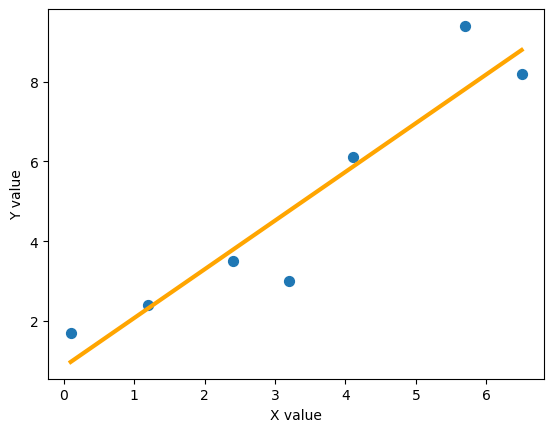

In [248]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('X value')
plt.ylabel('Y value')
plt.show()

In [249]:
# y_hat= (x * theta1) + theta0
y_hat = (x_5*1.2227264637835915) + 0.8475351486029536
print('Estimated values of y_hat are :\n' , y_hat)

print('Estimated values of y are :\n' , y_5)

Estimated values of y_hat are :
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Estimated values of y are :
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [250]:

def MSE(y , y_hat):
    RSS = sum((y-y_hat)**2)
    n=len(y)
    return RSS/n

In [251]:
print('The manually calculated value of MSE is: ', MSE(y_5,y_hat))


print('The mse function calculated value of MSE is: ', mean_squared_error(y_5,y_hat))

The manually calculated value of MSE is:  [0.94796558]
The mse function calculated value of MSE is:  0.9479655759794577


# 3D plotting of our MSE Cost Function
## Make Data from Thetas

In [252]:
nr_thetas=200
th_0=np.linspace(start=-1, stop=3, num=nr_thetas)
th_1=np.linspace(start=-1, stop=3, num=nr_thetas)

plot_t0, plot_t1 = np.meshgrid(th_0,th_1)
#plot_t0

### Calculate MSE for a nested for loop

In [253]:
plot_cost=np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat=plot_t0[i][j] + plot_t1[i][j]* x_5
        plot_cost[i][j]=mean_squared_error(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [254]:
#for i in range(3):
 #   for j in range(3):
  #      print(i,j,'\n')

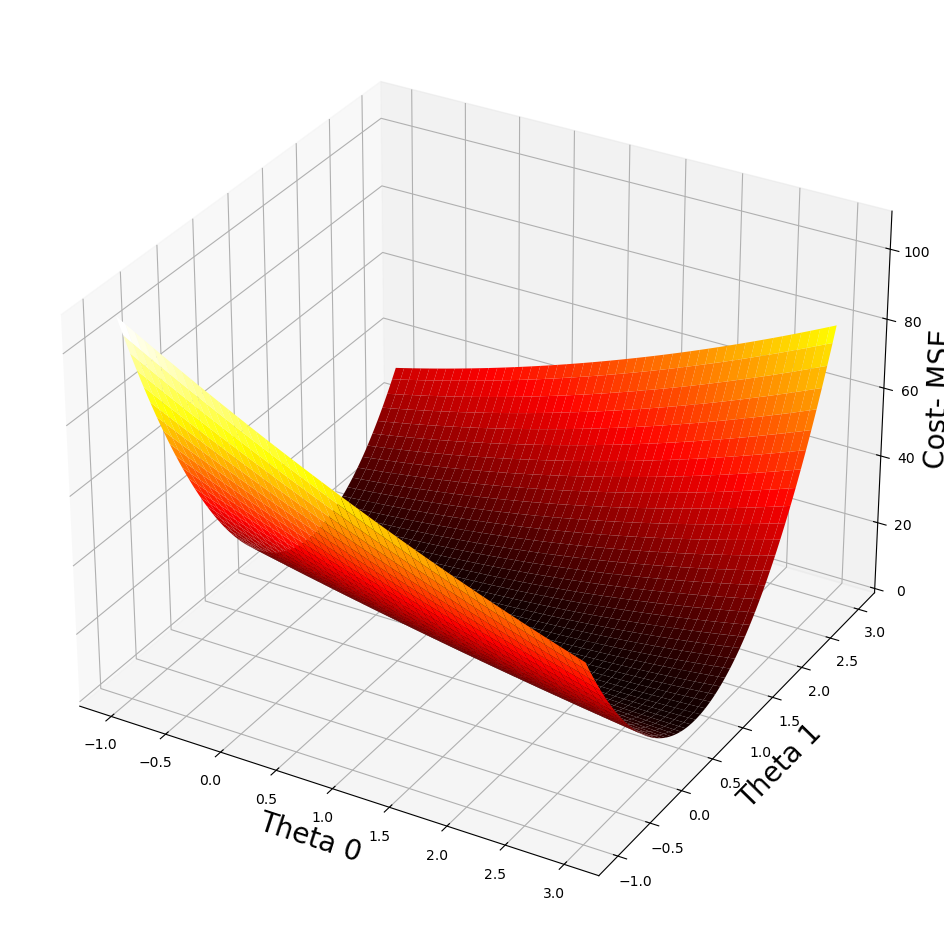

In [255]:
# Plot MSE
fig=plt.figure(figsize=[16,12])
ax=fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost- MSE', fontsize=20)

ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.hot)
plt.show()

In [256]:
print('The Min value of Cost-MSE is :', plot_cost.min())

The Min value of Cost-MSE is : 0.9483826526747164


## Partial Derivatives of MSE w.r.t $ \theta_0 $ and $ \theta_1 $
## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [257]:
def grad(x, y, thetas):
    n = y.size
    
    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [259]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mean_squared_error(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mean_squared_error(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mean_squared_error(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: 0.9479751138321334


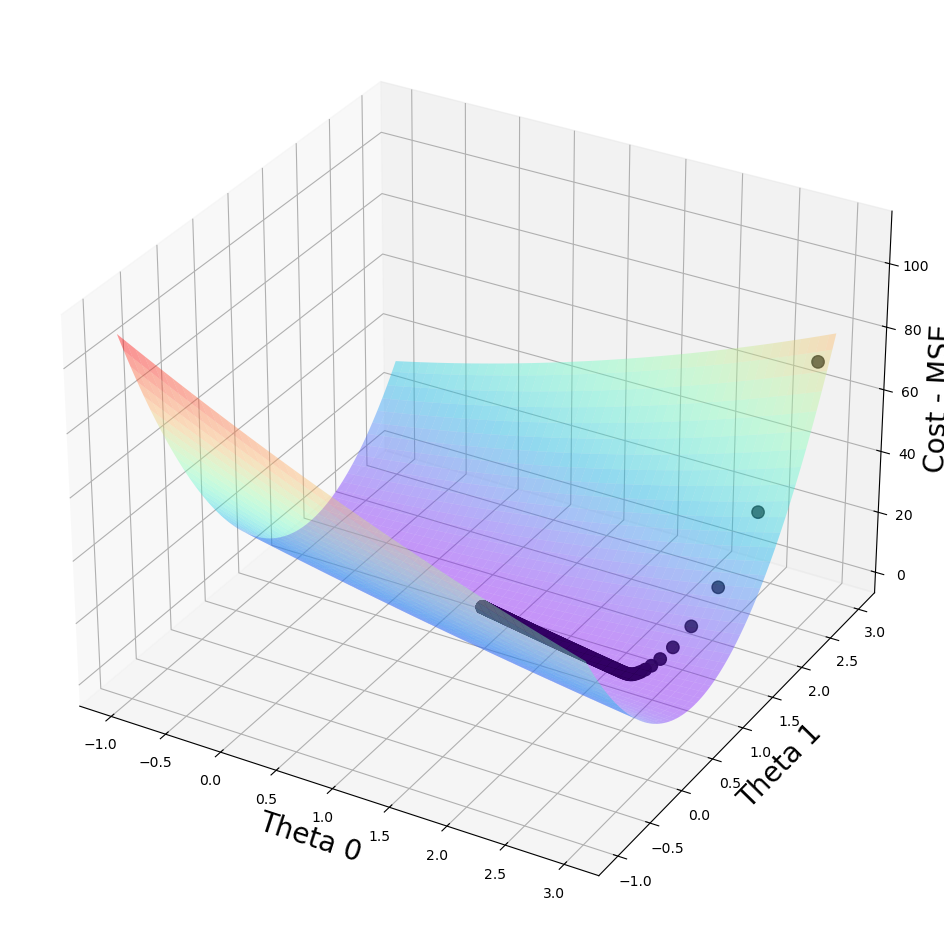

In [260]:
fig = plt.figure(figsize=[16, 12])
ax=fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()